In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from IPython.display import display
import seaborn as sns
%matplotlib inline
#pd.options.display.float_format = '{.3}'.format

import warnings
warnings.filterwarnings(action='ignore',module='scipy',message='^internal gelsd')

In [2]:
crime = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv',header=None)
crime.columns = ['city','population','violent_crime','murder_manslaughter','rape1','rape2','robbery','agg_assault','property_crime','burglary','larceny','motor_theft','arson']


In [3]:
# data cleaning

crime.drop(crime.index[[0,1,2,3,4,353,354,355]],inplace=True)
crime = crime.drop(['rape1'],axis=1)
crime = crime.reset_index(drop=True)

In [171]:
crime['arson'] = crime['arson'].fillna(0)

crime['population'] = crime['population'].apply(lambda x: str(x).replace(',',''))

crime['motor_theft'] = crime['motor_theft'].apply(lambda x: str(x).replace(',',''))
crime['robbery'] = crime['robbery'].apply(lambda x: str(x).replace(',',''))
crime['burglary'] = crime['burglary'].apply(lambda x: str(x).replace(',',''))
crime['property_crime'] = crime['property_crime'].apply(lambda x: str(x).replace(',',''))
crime['larceny'] = crime['larceny'].apply(lambda x: str(x).replace(',',''))
crime['violent_crime'] = crime['violent_crime'].apply(lambda x: str(x).replace(',',''))

crime['larcenysqrt'] = crime['larceny'].apply(lambda x: (int(x) ** (1/2)))
crime['populationlog'] = crime['population'].apply(lambda x: np.log(int(x)))
crime = crime[crime['city'] != 'New York']

In [178]:
crime[['populationlog','burglary','larcenysqrt']]=crime[['populationlog','burglary','larcenysqrt']].apply(pd.to_numeric)



In [179]:
x = crime[['populationlog','larcenysqrt','burglary']]
y = crime[['property_crime']]
          
regr = linear_model.LinearRegression()

regr.fit(x,y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-squared:',regr.score(x, y))

Coefficients: 
 [[-61.18234231  31.91729024   2.88878665]]
Intercept: 
 [311.26194393]
R-squared: 0.9879446435157911


In [180]:
#predicting y values
y_pred = regr.predict(x).ravel()

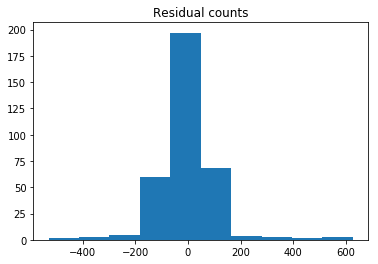

In [181]:
##multivariate normality
actual = crime['property_crime']

residual = actual.astype(float) - y_pred.astype(float)

plt.hist(residual,bins=10)
plt.title('Residual counts')
plt.show()

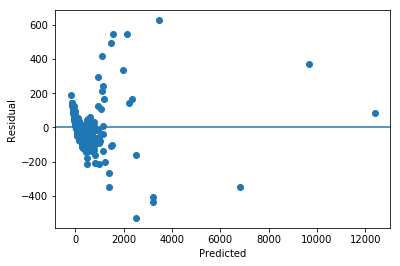

In [182]:
# homoscedasticity

plt.scatter(y_pred, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.show()

In [183]:
correlation_matrix = x.corr()
display(correlation_matrix)

,populationlog,larcenysqrt,burglary
populationlog,1.000000,0.813366,0.448578
larcenysqrt,0.813366,1.000000,0.756137
burglary,0.448578,0.756137,1.000000
